In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [14]:
df=pd.read_excel('/content/Airbnb_Open_Data.xlsx')

## Project Introduction

Airbnb Hotel Booking Analysis aims to uncover booking patterns, pricing strategies, guest preferences, and host performance to enhance the platform for both hosts and guests.


## Data Overview

Let's explore key columns in the dataset:



In [12]:
# Data Summary
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Missing Values:\n", df.isnull().sum())



Shape: (86706, 27)
Columns: ['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365', 'house_rules', 'license', 'month']
Missing Values:
 id                                    0
NAME                                234
host id                               0
host_identity_verified              247
host name                           328
neighbourhood group                  25
neighbourhood                        16
lat                                   7
long                                  7
country                             489
country code                        116
instant_bookable                     93
cancellation_policy                  67
r

In [13]:
# Preview data
df.sample(5)


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license,month
50933,29131632,Upper Manhattan Brownstone | Perfect for Families,83753795624,verified,Sumita,Manhattan,Harlem,40.82361,-73.94510,United States,...,3.0,20.0,2022-02-27,0.65,5.0,1.0,315.0,NaN,NaN,2.0
102249,13973758,Comfy Queen Size Bed Near Prospect Park!,21195593487,unconfirmed,Lisanne,Brooklyn,Prospect-Lefferts Gardens,40.65871,-73.95263,United States,...,2.0,15.0,2019-06-12,0.59,1.0,1.0,251.0,Overall please treat the apartment as you woul...,NaN,6.0
34379,19988858,Quiet Manhattan Bedroom - sublet/roommate,89966690828,verified,Caitlin,Manhattan,Inwood,40.86813,-73.92393,United States,...,30.0,9.0,2018-10-15,0.81,2.0,1.0,57.0,NaN,NaN,10.0
81274,45888966,"Master Bedroom in a Beautiful, Spacious Home",15025465982,unconfirmed,Jillian,Brooklyn,Bushwick,40.68683,-73.90733,United States,...,3.0,3.0,2018-10-07,0.23,5.0,2.0,0.0,- No gatherings/parties for more than 12 peopl...,NaN,10.0
32368,18878182,Bedstuy Fly! Two Bedroom Garden Apartment.,88847742836,verified,Ingrid,Brooklyn,Bedford-Stuyvesant,40.68902,-73.92838,United States,...,3.0,52.0,2019-06-22,3.90,5.0,1.0,37.0,Tenant Agreement: House Rules: The landlord re...,NaN,6.0


## Objective 1: Booking Patterns

Analyzing seasonality, geographic variations, and booking lead times.


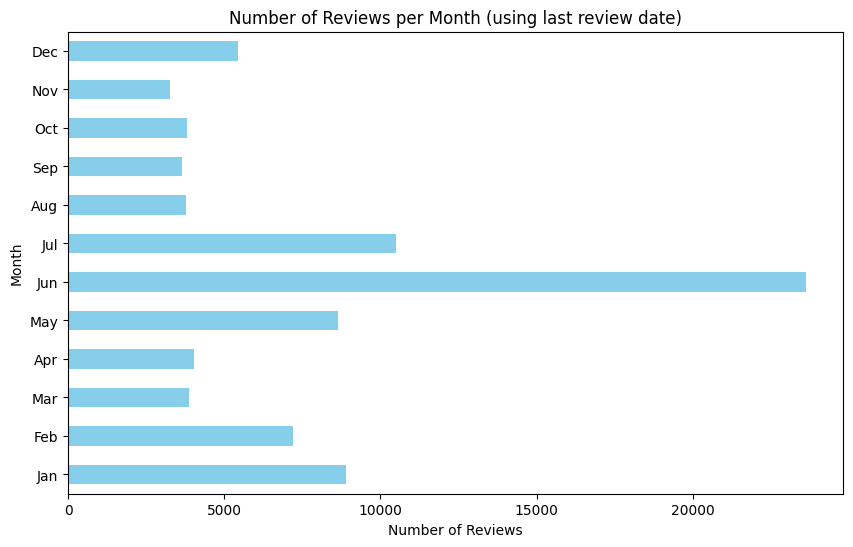

In [28]:
# Booking Patterns
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')
df['month'] = df['last review'].dt.month
# Drop rows where 'month' is NaN
df.dropna(subset=['month'], inplace=True)

# Calculate the counts for each month and sort by month number
month_counts = df['month'].value_counts().sort_index()

# Create a horizontal bar plot with a different color
plt.figure(figsize=(10, 6))
month_counts.plot(kind='barh', color='skyblue') # Changed color to skyblue
plt.title('Number of Reviews per Month (using last review date)')
plt.xlabel('Number of Reviews')
plt.ylabel('Month')
plt.yticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) # Label months with names
plt.show()

## Objective 2: Pricing Strategies

Assessing pricing efficiency, seasonality impact, and its relation to satisfaction.


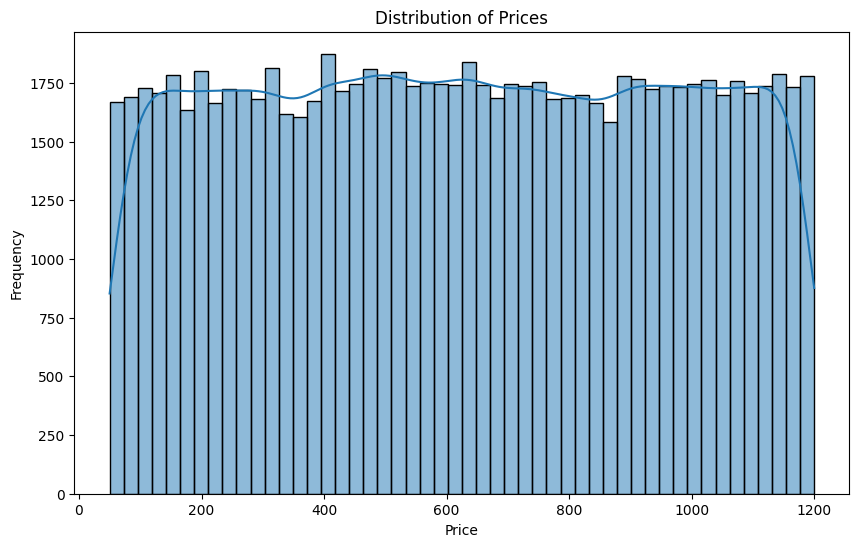

In [29]:
# Pricing Strategies
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', kde=True, bins=50) # Using histplot with kde for a smooth line
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Objective 3: Guest Preferences

Determining popular amenities and features that drive high ratings.


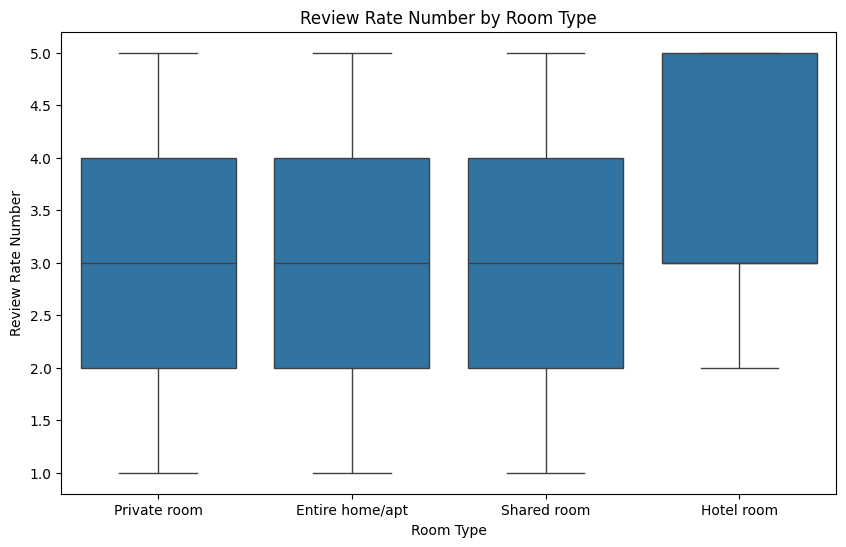

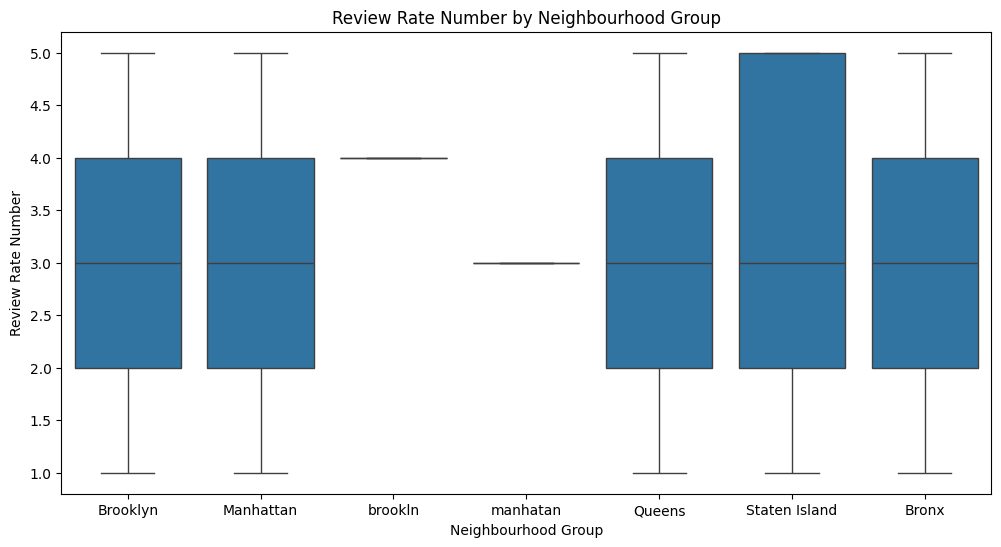

In [31]:
# Based on the available columns, analyzing review rate by room type could provide insights into guest preferences
plt.figure(figsize=(10, 6))
sns.boxplot(x='room type', y='review rate number', data=df)
plt.title('Review Rate Number by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Review Rate Number')
plt.show()

# We could also analyze review rate by neighbourhood group
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood group', y='review rate number', data=df)
plt.title('Review Rate Number by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Review Rate Number')
plt.show()

## Objective 4: Host Performance

Exploring how host responsiveness and rating impact guest experience.


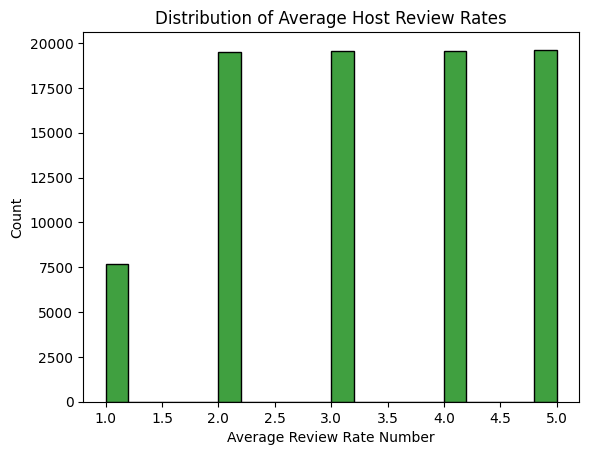

In [36]:
# Host rating distribution

host_ratings = df.groupby('host id')['review rate number'].mean().dropna()
sns.histplot(host_ratings, bins=20, color='green')
plt.title('Distribution of Average Host Review Rates')
plt.xlabel('Average Review Rate Number')
plt.show()